In [ ]:
# Родин Владимир, БЭК 216, 7 группа, год учился на кафедре немецкого языка в другом городе =)

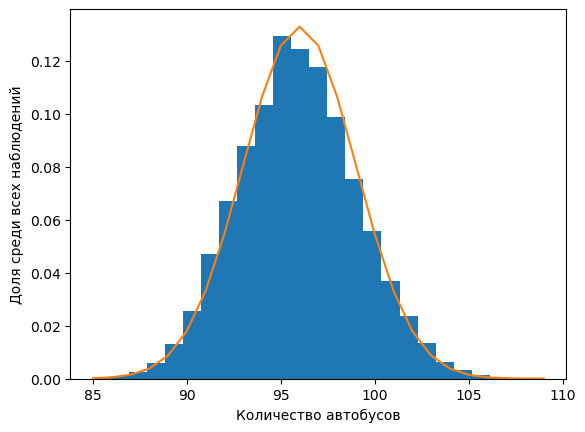

Вывод: Распределение количества автобусов похоже на нормальное


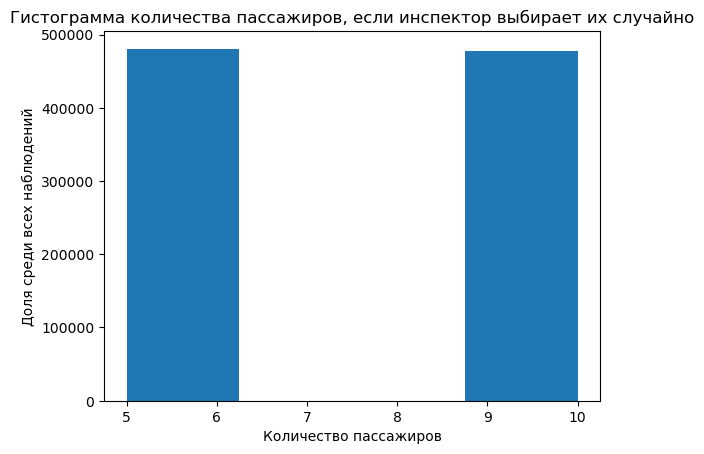

Вывод: Случайным образом выбирая автобус, мы будем равновероятно ехать на 10-минутном и 5-минутном, что по условию соответсвует количеству человек на автобусе. Инспектора я не учитывал как пассажира.

Среднее значение: 7.493227405822606

Дисперсия: 6.24995413196811


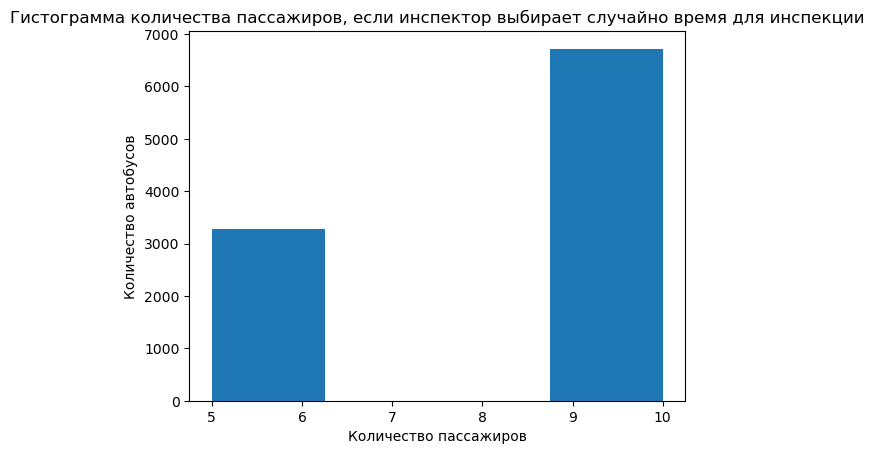

Вывод: Если выбирать время случайное время, то окажется, что мы чаще ездим на автобусе 10-минутном, то есть на том, на котором 10 человек. Так же этого говорит, что в среднем нам предется ждать дольше чем просто среднее арифметическое значение (7.5 мин).

Среднее значение: 8.359

Дисперсия: 5.512119


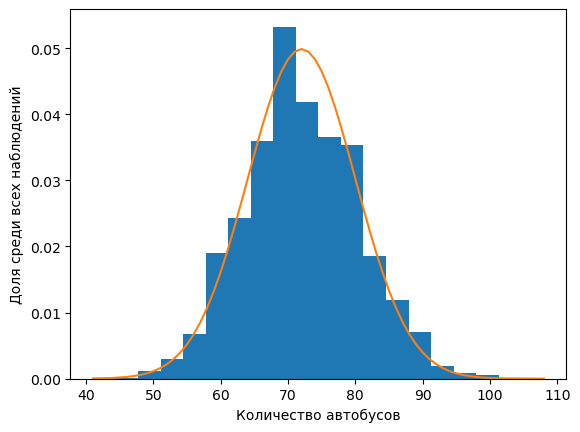

Вывод: Распределение количества автобусов похоже на нормальное


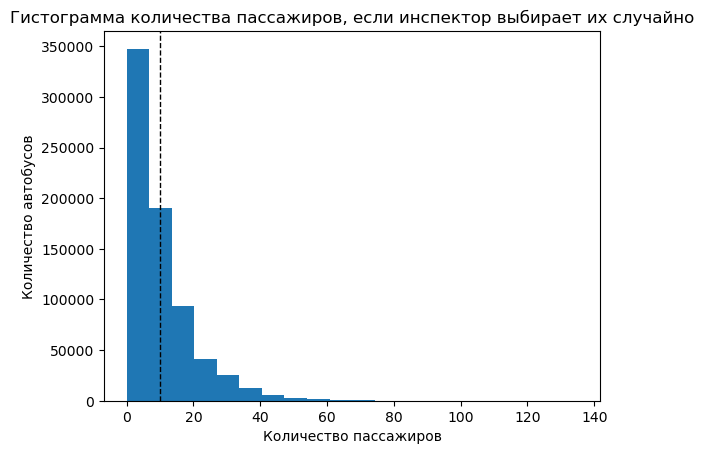

Среднее значение: 9.846243582790157

Дисперсия: 96.56096903500753


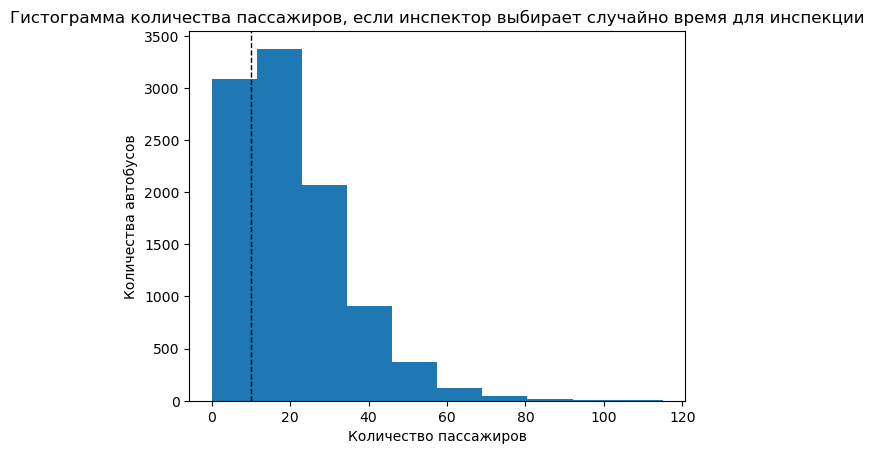

Среднее значение: 20.1892

Дисперсия: 194.11140335999997

Вывод: распределение все ещё выглядит как экспоненциальное, однако видно, что значения в диапазоне 0;20 стали гораздо чаще, что увеличило среднее значение времени ожидания(= среднее количество пассажиров)


In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

    #Задача 1

n_obs = 10**4
np.random.seed(1586)

simulations = np.random.choice(np.array([5, 10]), (n_obs, 144)) # генерируем 10**4 дней работы остановки. Количество автобусов не может быть больше 144, так как 144*5=720=60*12
simulations_cumsum = np.cumsum(simulations, axis=1)
simulations_cumsum[simulations_cumsum > 720] = 0 # зануляем все автобусы, которые приехали после 20:00
simulations[simulations_cumsum == 0] = 0 

# Пункт а

simulations_a = simulations.copy()
simulations_a[(simulations == 5)] = 1
simulations_a[(simulations == 10)] = 1
simulations_a = np.sum(simulations_a, axis=1)

plt.hist(simulations_a, bins=len(np.unique(simulations_a)), density=True)
plt.ylabel('Доля среди всех наблюдений')
plt.xlabel('Количество автобусов')

pdf = stats.norm(loc=96, scale=3).pdf(np.unique(simulations_a))
plt.plot(np.unique(simulations_a), pdf)
plt.show()

print('Вывод: Распределение количества автобусов похоже на нормальное')

#Пункт б

# В автобусе будет либо 5 либо 10 человек, так как их количество = их времени ожидания

simulations_b = simulations.copy()
simulations_b = simulations_b[simulations_b != 0] # просто убираю все автобусы, которые приедут после 20:00 

plt.hist(simulations_b, bins=4,lw=0)
plt.ylabel('Доля среди всех наблюдений')
plt.xlabel('Количество пассажиров')
plt.title('Гистограмма количества пассажиров, если инспектор выбирает их случайно')
plt.show()

print('Вывод: Случайным образом выбирая автобус, мы будем равновероятно ехать на 10-минутном и 5-минутном, что по условию соответсвует количеству человек на автобусе. Инспектора я не учитывал как пассажира.')
print()
print('Среднее значение:', np.mean(simulations_b))
print()
print('Дисперсия:', np.var(simulations_b))

#Пункт в

timing = np.random.choice(range(720), n_obs) # для каждой симуляции случайно определим, когда придет инспектор
simulations_v = np.zeros(n_obs)

for i in range(n_obs):
    auto_chosen = simulations_cumsum[i, ::][simulations_cumsum[i, ::] >= timing[1]][0] # найдем автобус, на который он сядет
    auto_chosen1 = int(np.where(simulations_cumsum[i, ::] == auto_chosen)[0])
    simulations_v[i] = auto_chosen - simulations_cumsum[i, auto_chosen1 - 1] # разница в минутах (= количестве людей) от того, на котором едет инспектор 

plt.hist(simulations_v, bins=4)
plt.ylabel('Количество автобусов')
plt.xlabel('Количество пассажиров')
plt.title('Гистограмма количества пассажиров, если инспектор выбирает случайно время для инспекции')
plt.show()

print('Вывод: Если выбирать время случайное время, то окажется, что мы чаще ездим на автобусе 10-минутном, то есть на том, на котором 10 человек. Так же этого говорит, что в среднем нам предется ждать дольше чем просто среднее арифметическое значение (7.5 мин).')
print()
print('Среднее значение:', np.mean(simulations_v))
print()
print('Дисперсия:', np.var(simulations_v))

#Пункт г

simulations = stats.expon.rvs(scale=10, size=(n_obs,n_obs)) # такая большая матрица нужна, чтобы точно быть уверенным, что автобусов хватит на целый день
simulations_cumsum = np.cumsum(simulations, axis=1)
simulations_cumsum[simulations_cumsum > 720] = 0
simulations[simulations_cumsum == 0] = 0

# Пункт г_а

simulations_a = simulations.copy()
simulations_a[simulations != 0] = 1
simulations_a = np.sum(simulations_a, axis=1)

plt.hist(simulations_a, bins=20, density=True)
plt.ylabel('Доля среди всех наблюдений')
plt.xlabel('Количество автобусов')

pdf = stats.norm(loc=72, scale=8).pdf(np.unique(simulations_a))
plt.plot(np.unique(simulations_a), pdf)
plt.show()

print('Вывод: Распределение количества автобусов похоже на нормальное')

#Пункт г_б

simulations_b = simulations.copy()
simulations_b = simulations_b[simulations_b != 0]

simulations_b = np.round(simulations_b)

plt.hist(simulations_b, bins=20, lw=0)
plt.ylabel('Количество автобусов')
plt.xlabel('Количество пассажиров')
plt.title('Гистограмма количества пассажиров, если инспектор выбирает их случайно')
plt.axvline(10, color='black', linestyle="--", lw=1)
plt.show()

print('Среднее значение:', np.mean(simulations_b))
print()
print('Дисперсия:', np.var(simulations_b))

#Пункт г_в

timing = np.random.choice(range(720), n_obs)
simulations_v = np.zeros(n_obs)

for i in range(n_obs):
    auto_chosen = simulations_cumsum[i, ::][simulations_cumsum[i, ::] >= timing[1]][0]
    auto_chosen1 = int(np.where(simulations_cumsum[i, ::] == auto_chosen)[0])
    simulations_v[i] = auto_chosen - simulations_cumsum[i, auto_chosen1 - 1]

simulations_v = np.round(simulations_v) #округляю, поскольку предполагаю, что количество людей дискретно

plt.hist(simulations_v, bins=10)
plt.ylabel('Количества автобусов')
plt.xlabel('Количество пассажиров')
plt.title('Гистограмма количества пассажиров, если инспектор выбирает случайно время для инспекции')
plt.axvline(10, color='black', linestyle="--", lw=1)
plt.show()

print('Среднее значение:', np.mean(simulations_v))
print()
print('Дисперсия:', np.var(simulations_v))
print()
print('Вывод: распределение все ещё выглядит как экспоненциальное, однако видно, что значения в диапазоне 0;20 стали гораздо чаще, что увеличило среднее значение времени ожидания(= среднее количество пассажиров)')

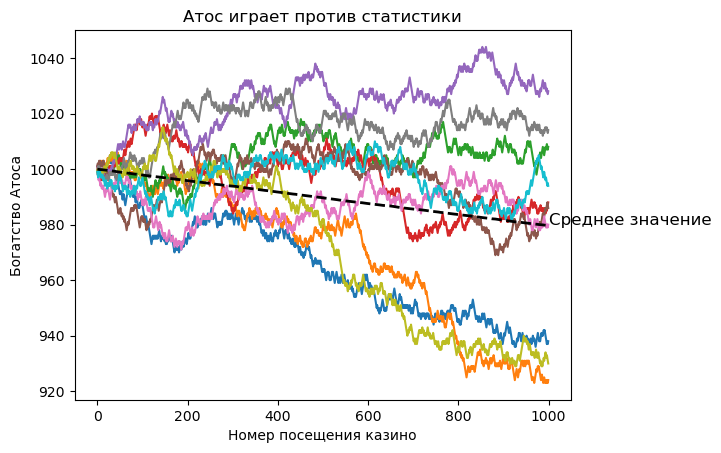

Выводы: Атос играет в казино, где шанс проиграть выше чем выиграть. Как следствие, он проигрывает.


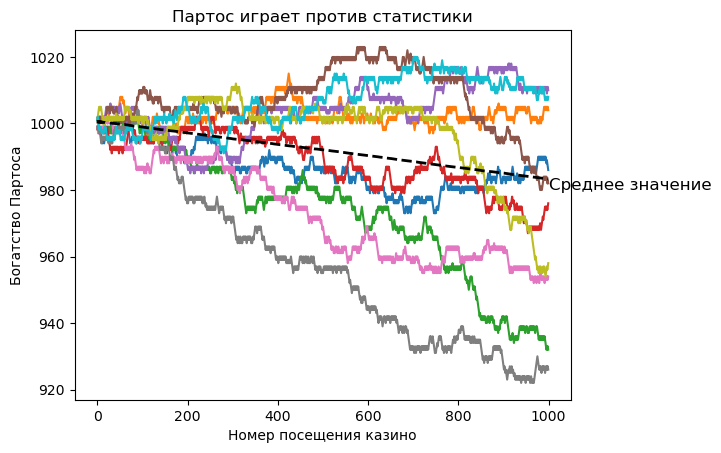

Вывод: Партос играет в казино, где шанс проиграть выше чем выиграть. Как следствие, он проигрывает.


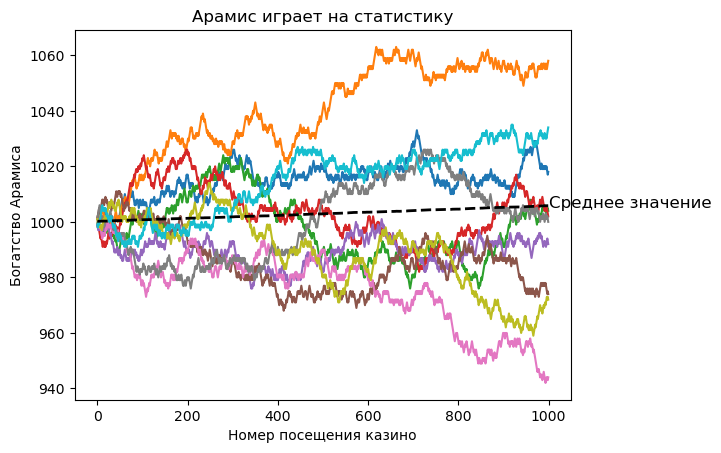

Вывод: случайным образом выбирая казино, Арамис в целом выигрывает, хотя некоторы отдельные симуляции могут проигрывать.


In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

    # Задача 2

n_obs = 10**4
np.random.seed(1586)

# Пункт а

At = np.random.choice([-1, 1], p=[0.51, 0.49], size=(n_obs, 1000))
At[:, 0] = At[:, 0] + 1000
At = np.cumsum(At, axis=1)

idx_At = np.random.choice(np.arange(n_obs), size=10, replace=False) #Генерируем 10 случайных номеров симуляций, которые будем выводить

At_mean = np.mean(At, axis=0)

plt.plot(At[idx_At[0]]) 
plt.plot(At[idx_At[1]])
plt.plot(At[idx_At[2]])
plt.plot(At[idx_At[3]])
plt.plot(At[idx_At[4]])
plt.plot(At[idx_At[5]])
plt.plot(At[idx_At[6]])
plt.plot(At[idx_At[7]])
plt.plot(At[idx_At[8]])
plt.plot(At[idx_At[9]])
plt.plot(At_mean, color='black', linestyle='dashed', linewidth=2)
plt.text(1000, 980,'Среднее значение', color='black', fontsize=12)
plt.xlabel('Номер посещения казино')
plt.ylabel('Богатство Атоса')
plt.title('Атос играет против статистики')
plt.show()

print('Выводы: Атос играет в казино, где шанс проиграть выше чем выиграть. Как следствие, он проигрывает.')

# Пункт б

Pa = np.tile(1000, (n_obs, 1001))

for i in range(1, 1001): # первый столбец- первоначальное богатство. Далее пробигаем все столбцы со второго и прибавляем -1 или +1 с вероятностями в зависимости от соблюдения условия
    if len(Pa[:, i][Pa[:, i - 1] % 3 != 0]) != 0:
        Pa[:, i][Pa[:, i - 1] % 3 != 0] = Pa[:, i - 1][Pa[:, i - 1] % 3 != 0] + np.random.choice([-1, 1], p=[0.26, 0.74], size=len(Pa[:, i][Pa[:, i - 1] % 3 != 0]))
    if len(Pa[:, i][Pa[:, i-1] % 3 == 0]) != 0:
        Pa[:, i][Pa[:, i - 1] % 3 == 0] = Pa[:, i - 1][Pa[:, i - 1] % 3 == 0] + + np.random.choice([-1, 1], p=[0.91, 0.09], size=len(Pa[:, i][Pa[:, i - 1] % 3 == 0]))
Pa = Pa[:, 1:] # первый столбец- первоначальное богатство

idx_Pa = np.random.choice(np.arange(n_obs), size=10, replace=False)  #Генерируем 10 случайных номеров симуляций, которые будем выводить

Pa_mean = np.mean(Pa, axis=0)

plt.plot(Pa[idx_Pa[0]])
plt.plot(Pa[idx_Pa[1]])
plt.plot(Pa[idx_Pa[2]])
plt.plot(Pa[idx_Pa[3]])
plt.plot(Pa[idx_Pa[4]])
plt.plot(Pa[idx_Pa[5]])
plt.plot(Pa[idx_Pa[6]])
plt.plot(Pa[idx_Pa[7]])
plt.plot(Pa[idx_Pa[8]])
plt.plot(Pa[idx_Pa[9]])
plt.plot(Pa_mean, color='black', linestyle='dashed', linewidth=2)
plt.text(1000, 980,'Среднее значение', color='black', fontsize=12)
plt.xlabel('Номер посещения казино')
plt.ylabel('Богатство Партоса')
plt.title('Партос играет против статистики')
plt.show()

print('Вывод: Партос играет в казино, где шанс проиграть выше чем выиграть. Как следствие, он проигрывает.')

# Пункт В

Casino_chosen = np.random.choice([0, 1], (n_obs, 1000)) #для каждого похода в казино в каждой симуляции выбираем казино 0-А, 1-Б

Ar = np.tile(1000, (n_obs, 1001))

for i in range(1, 1001):
# если казино А- прибовляем -1 или +1, если казино Б, то (определяем) предыдущий элемент в строке делится ли на три, а потом уже прибавляем +-1 в зависмости от выполнения условия 
    cond1 = Ar[::, i - 1] % 3 == 0 
    cond2 = Ar[::, i - 1] % 3 != 0

    Ar[::, i][Casino_chosen[::, i - 1] == 0] = Ar[::, i - 1][Casino_chosen[::, i - 1] == 0] + np.random.choice([-1, 1], p=[0.51, 0.49], size=len(Ar[::, i][Casino_chosen[::, i - 1] == 0]))
    Ar[::, i][(Casino_chosen[::, i - 1] == 1) & cond1] = Ar[::, i - 1][(Casino_chosen[::, i - 1] == 1) & cond1] + np.random.choice([-1, 1], p=[0.91, 0.09], size=len(Ar[::, i][(Casino_chosen[::, i - 1] == 1) & cond1]))
    Ar[::, i][(Casino_chosen[::, i - 1] == 1) & cond2] = Ar[::, i - 1][(Casino_chosen[::, i - 1] == 1) & cond2] + np.random.choice([-1, 1], p=[0.26, 0.74], size=len(Ar[::, i][(Casino_chosen[::, i - 1] == 1) & cond2]))

Ar = Ar[:, 1:]

idx_Ar = np.random.choice(np.arange(n_obs), size=10, replace=False) #Генерируем 10 случайных номеров симуляций, которые будем выводить

Ar_mean = np.mean(Ar, axis=0)
plt.plot(Ar[idx_Ar[0]])
plt.plot(Ar[idx_Ar[1]])
plt.plot(Ar[idx_Ar[2]])
plt.plot(Ar[idx_Ar[3]])
plt.plot(Ar[idx_Ar[4]])
plt.plot(Ar[idx_Ar[5]])
plt.plot(Ar[idx_Ar[6]])
plt.plot(Ar[idx_Ar[7]])
plt.plot(Ar[idx_Ar[8]])
plt.plot(Ar[idx_Ar[9]])
plt.plot(Ar_mean, color='black', linestyle='dashed', linewidth=2)
plt.text(1000, 1005,'Среднее значение', color='black', fontsize=12)
plt.xlabel('Номер посещения казино')
plt.ylabel('Богатство Арамиса')
plt.title('Арамис играет на статистику')
plt.show()

print('Вывод: случайным образом выбирая казино, Арамис в целом выигрывает, хотя некоторы отдельные симуляции могут проигрывать.')


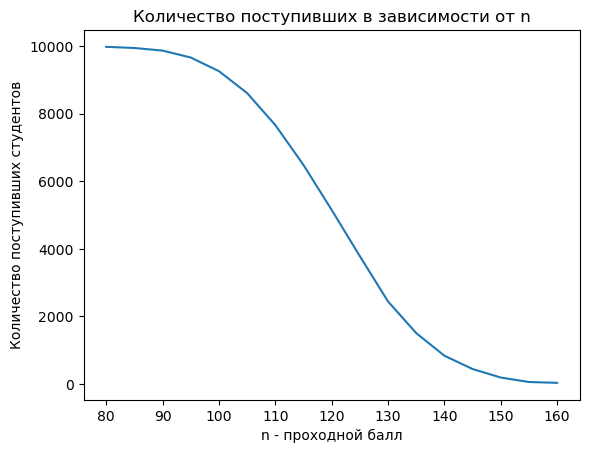

Вывод: Количество студентов снижается с повышением проходного бала, здесь cильно удивительного не наблюдаю.


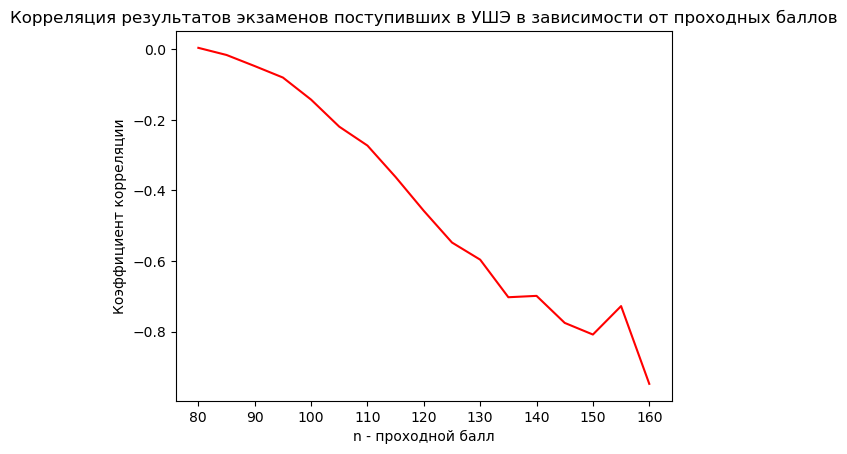

Вывод: При наступлении события "Поступление в УШЭ" изначально независимые случайные величины начинают коррелировать.


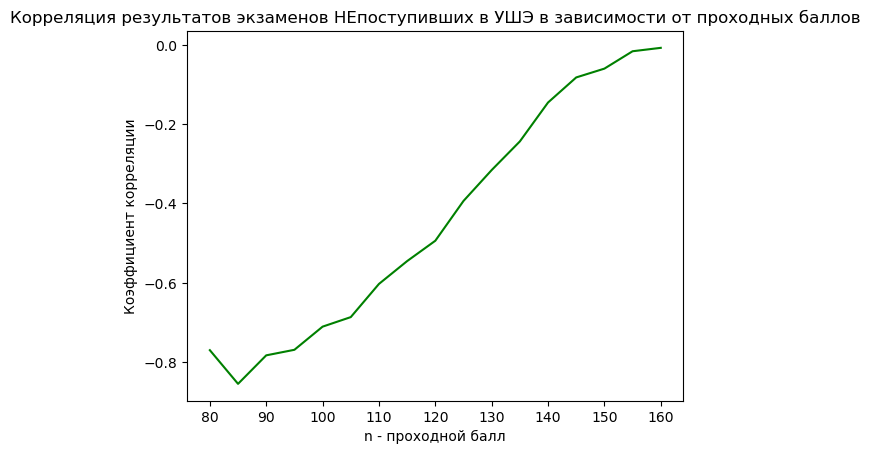

Вывод: При наступлении события "НЕпоступление в УШЭ" изначально независимые случайные величины начинают коррелировать. Кроме того, хочу отметить, что линия перестает быть такой ломанной при повышении количества симуляций.




In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Задача 3

# Пункт а

n_obs = 10 ** 4
np.random.seed(1586)
norm_rv = stats.norm(loc=60, scale=10)

math = np.round(norm_rv.rvs(size=(17, n_obs))) #для каждого n генерируем отдельную симуляцию 10**4 студентов
rus = np.round(norm_rv.rvs(size=(17, n_obs)))

grades = rus + math # каждый элемент- студент, строка- одна симуляиця

st_pass = [] #Массив количества студентов, которые поступили в университет для каждого n
for i in range(0, 17):
    st_pass.append(
        len(grades[i, ::][grades[i, ::] >= 80 + i * 5]))  # количество студентов, которые прошли для каждого n

n = range(80, 165, 5)

plt.plot(n, st_pass)
plt.xlabel('n - проходной балл')
plt.ylabel('Количество поступивших студентов')
plt.title('Количество поступивших в зависимости от n')
plt.show()

print('Вывод: Количество студентов снижается с повышением проходного бала, здесь cильно удивительного не наблюдаю.')

# Пункт б

math_pass = math.copy()
russ_pass = rus.copy()

dic_pass = {} # словарь вида 'n':[[баллы студентов по математике по порядку],[баллы студентов по русскому по порядку]]
for i in range(0, 17):
    dic_pass[80 + i * 5] = [math_pass[i, ::][grades[i, ::] >= 80 + i * 5],
                            russ_pass[i, ::][grades[i, ::] >= 80 + i * 5]]

subjCorr_pass = [] #массив коэфициентов корреляции для каждого n
for i in range(0, 17):
    subjCorr_pass.append(np.corrcoef(dic_pass[80 + i * 5][0], dic_pass[80 + i * 5][1])[0][1])
    
n = range(80, 165, 5)
plt.xlabel('n - проходной балл')
plt.ylabel('Коэффициент корреляции')
plt.title('Корреляция результатов экзаменов поступивших в УШЭ в зависимости от проходных баллов')
plt.plot(n, subjCorr_pass,color='red')
plt.show()

print('Вывод: При наступлении события "Поступление в УШЭ" изначально независимые случайные величины начинают коррелировать.')

# Пункт в

math_pass_not = math.copy()
russ_pass_not = rus.copy()

dic_pass_not = {}
for i in range(0, 17):
    dic_pass_not[80 + i * 5] = [math_pass_not[i, ::][grades[i, ::] < 80 + i * 5],
                                russ_pass_not[i, ::][grades[i, ::] < 80 + i * 5]]

subjCorr_pass_not = []
for i in range(0, 17):
    subjCorr_pass_not.append(np.corrcoef(dic_pass_not[80 + i * 5][0], dic_pass_not[80 + i * 5][1])[0][1])

n = range(80, 165, 5)
plt.xlabel('n - проходной балл')
plt.ylabel('Коэффициент корреляции')
plt.title('Корреляция результатов экзаменов НЕпоступивших в УШЭ в зависимости от проходных баллов')
plt.plot(n, subjCorr_pass_not,color='green')
plt.show()

print('Вывод: При наступлении события "НЕпоступление в УШЭ" изначально независимые случайные величины начинают коррелировать. Кроме того, хочу отметить, что линия перестает быть такой ломанной при повышении количества симуляций.')
print()
print()

<img src="phoo.jpg">


Вот такую штуку нашёл в СПБ
https://www.youtube.com/watch?v=v7ScGV5128A